## LinearSVC, SVC, and SGDClassifier

This exercise compares the output of the three algorithms on a linearly sperable dataset (iris)

In [7]:
import numpy as np
from sklearn import datasets

#Get data from scikit-learn
data = datasets.load_iris()
X = data['data']
y = data['target']

In [12]:
#Filter by Seratosa or Versicolor classes and petal length/width features
X = X[(y == 0) | (y == 1)][:,(2,3)]
y = y[(y == 0) | (y == 1)]

In [23]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

#Hyperparameters
C = 2.5
alpha = .002

#Scale features, important in SVMs!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Fit models
lin_clf = LinearSVC(loss='hinge', C=C).fit(X_scaled,y)
svm_clf = SVC(kernel='linear', C=C).fit(X_scaled,y)
sgd_clf = SGDClassifier(loss='hinge', alpha=alpha, max_iter=100000, tol=-np.Infinity).fit(X_scaled,y)

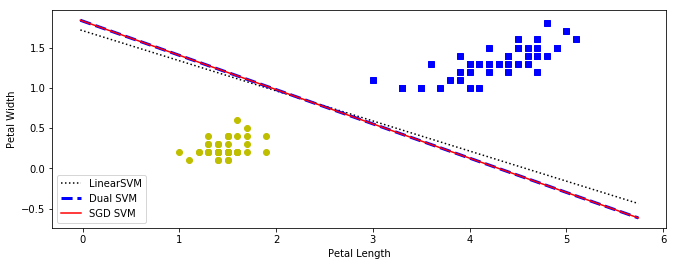

In [36]:
import matplotlib.pyplot as plt

#Get the margin lines for each classifier
#
#domain over full range, calculate the range values at these points
#
lin_margin = scaler.inverse_transform([
    [-2,((-1 * (lin_clf.coef_[0,0] * -2)) - lin_clf.intercept_[0]) / lin_clf.coef_[0,1]],
    [2,((-1 * (lin_clf.coef_[0,0] * 2)) - lin_clf.intercept_[0]) / lin_clf.coef_[0,1]]
])
svm_margin = scaler.inverse_transform([
    [-2,((-1 * (svm_clf.coef_[0,0] * -2)) - svm_clf.intercept_[0]) / svm_clf.coef_[0,1]],
    [2,((-1 * (svm_clf.coef_[0,0] * 2)) - svm_clf.intercept_[0]) / svm_clf.coef_[0,1]]
])
sgd_margin = scaler.inverse_transform([
    [-2,((-1 * (sgd_clf.coef_[0,0] * -2)) - sgd_clf.intercept_[0]) / sgd_clf.coef_[0,1]],
    [2,((-1 * (sgd_clf.coef_[0,0] * 2)) - sgd_clf.intercept_[0]) / sgd_clf.coef_[0,1]]
])


plt.figure(figsize=(11,4))

#Plot the margins
plt.plot(lin_margin[:,0],lin_margin[:,1],'k:',label='LinearSVM')
plt.plot(svm_margin[:,0],svm_margin[:,1],'b--',linewidth=3,label='Dual SVM')
plt.plot(sgd_margin[:,0],sgd_margin[:,1],'r-',label='SGD SVM')

#Plot data
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo')

#Labels
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
_ = plt.legend()

As we can see all three models get very similar results, on simple data that's linearly seperable!!